# **About the Author**

I’m Amna Sabahat, a passionate learner with a strong enthusiasm for exploring new ideas and continuously growing. 
* Let’s grow and learn together!
* 🔗 Check out my [LinkedIn](https://www.linkedin.com/in/amna-sabahat-6b3713253/).
* 🤝 Feel free to connect and reach out for collaborations!


#  **Import Libraries**

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [52]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

#  **Data Inspection**

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* SibSp = Number of siblings/spouses
* Parch = Number of Parents/children
* Sex = Male and Female
* Pclass = Passenger Class -1,2,3
* Embaeked:
  * C = Cherbourg (France)
  * Q = Queenstown (Ireland)
  * S = Southampton (England)

In [55]:
df.size

10692

In [56]:
df.shape

(891, 12)

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#  **Handling Missing Values**

In [60]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)


In [62]:
df[['Sex']].value_counts()

Sex   
male      577
female    314
Name: count, dtype: int64

In [65]:
# Fill only missing values with mean
df["Age"].fillna(df["Age"].median(), inplace=True)


In [66]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [67]:
df['Embarked'].count()

889

In [68]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [69]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#  **Data Visualizations**

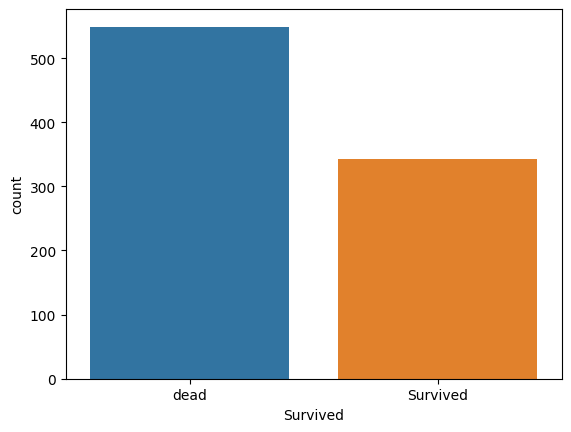

In [70]:
sns.countplot(x="Survived", data=df)
plt.xticks([0,1], ["dead", "Survived"])
plt.show()

In [71]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

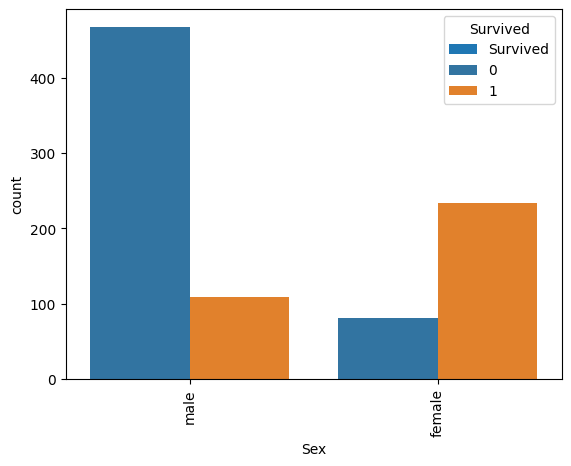

In [72]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

In [73]:
# S = 0, C= 1, Q= 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,0
5,0,3,male,28.0,0,0,8.4583,2
6,0,1,male,54.0,0,0,51.8625,0
7,0,3,male,2.0,3,1,21.0750,0
8,1,3,female,27.0,0,2,11.1333,0
9,1,2,female,14.0,1,0,30.0708,1


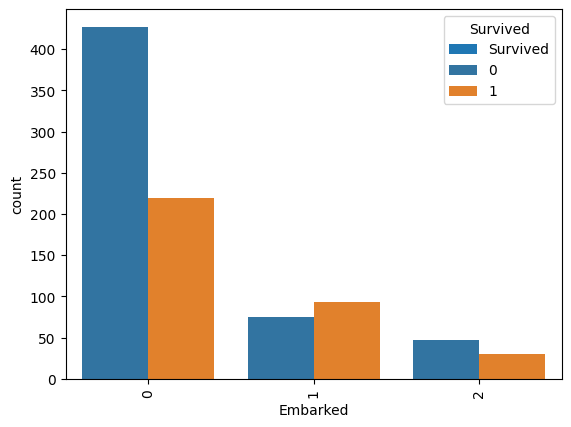

In [74]:
df[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()

In [75]:
# male = 0, female= 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,28.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


In [76]:
df= df.astype({'Age':int})
df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
5,0,3,0,28,0,0,8.4583,2
6,0,1,0,54,0,0,51.8625,0
7,0,3,0,2,3,1,21.0750,0
8,1,3,1,27,0,2,11.1333,0
9,1,2,1,14,1,0,30.0708,1


In [77]:
df['Family_size']=df['SibSp']+df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.9250,0,0
3,1,1,1,35,1,0,53.1000,0,1
4,0,3,0,35,0,0,8.0500,0,0


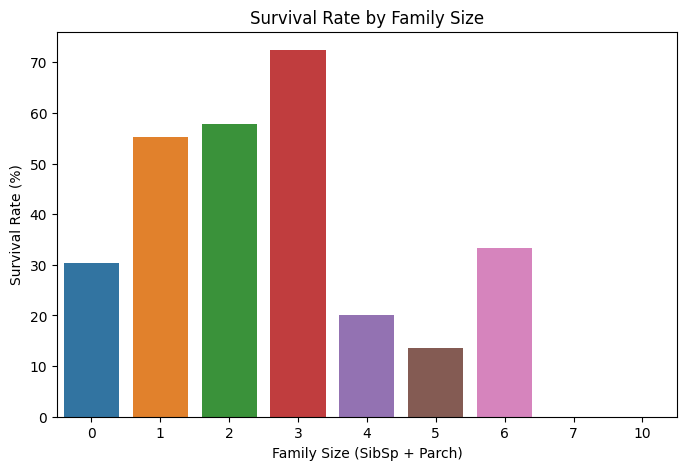

In [78]:
family_survival = df.groupby('Family_size')['Survived'].mean().reset_index()
family_survival['Survived'] = family_survival['Survived'] *100
plt.figure(figsize=(8,5))
sns.barplot(x='Family_size', y='Survived', data=family_survival)
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Family Size (SibSp + Parch)")
plt.show()


In [79]:
# 1 = Passenger was travelling alone (no siblings/spouse/parents/children )
# 0 = Passenger was NOT alone (travelled with family members)
df['is_alone'] = 0
df.loc[df['Family_size'] == 0 ,'is_alone']=1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,is_alone
0,0,3,0,22,1,0,7.2500,0,1,0
1,1,1,1,38,1,0,71.2833,1,1,0
2,1,3,1,26,0,0,7.9250,0,0,1
3,1,1,1,35,1,0,53.1000,0,1,0
4,0,3,0,35,0,0,8.0500,0,0,1


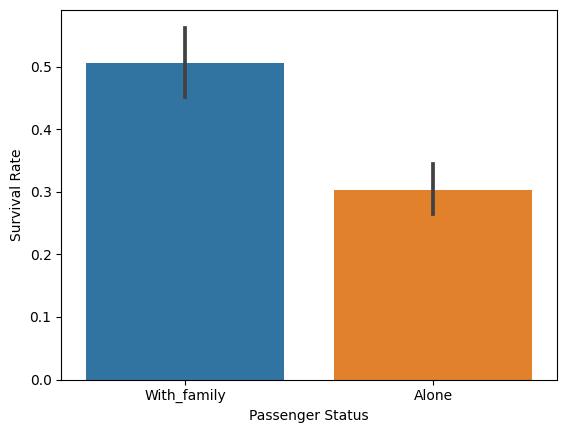

In [80]:
sns.barplot(x='is_alone', y='Survived', data=df)
plt.xticks([0,1], ['With_family','Alone'])
plt.xlabel("Passenger Status")
plt.ylabel("Survival Rate")
plt.show()


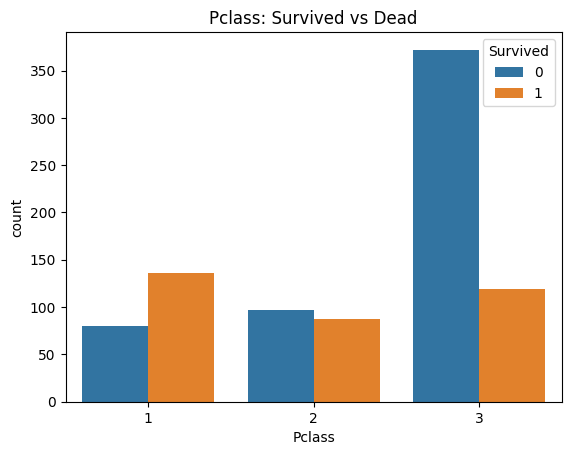

In [81]:
# death = 0 , survived = 1
sns.countplot(x= 'Pclass', hue='Survived', data=df)
plt.title('Pclass: Survived vs Dead')
plt.show()

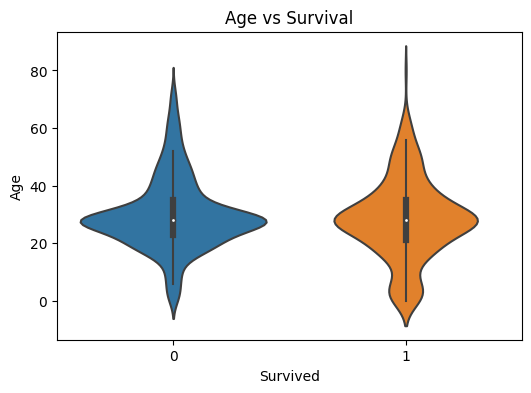

In [82]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Survived', y='Age', data=df, split=True)
plt.title("Age vs Survival")
plt.show()

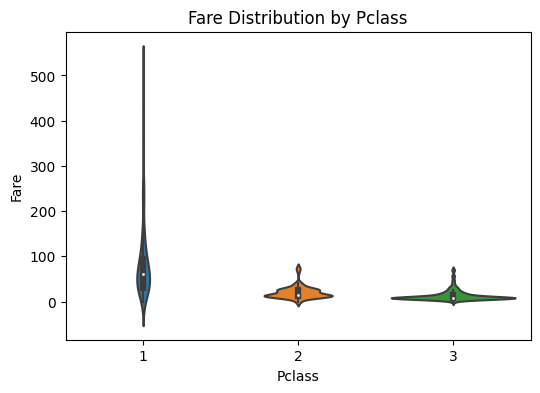

In [85]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.show()


# **Conclusion**
In this notebook, we explored the Titanic dataset, performed data cleaning, feature engineering, and exploratory data analysis (EDA). We visualized relationships between passenger features (such as age, gender, class, and family size) and survival rates.

# **Key Insights:**
* Female passengers had a much higher chance of survival compared to males.
* Passengers in higher classes (Pclass 1) were more likely to survive than those in lower classes.
* Family presence (not being alone) slightly increased survival chances.
* Fare and Age also showed meaningful patterns when analyzed against survival.

**This analysis not only highlights the importance of demographic and socio-economic factors in survival but also provides a strong foundation for building predictive models.**

# **Thank You**

Thank you for reading my notebook! 

If you found it helpful, please consider upvoting and sharing your feedback.

Let’s keep learning and growing together. 